In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model 

In [ ]:
#Load the data

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0

print('xtrain.shape',x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
xtrain.shape (60000, 28, 28)


In [ ]:
# the data is only 2d
# convolution expects height * widht * color

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# number of classes 
k = len(set(y_train))
print('number of classes are: ',k)

number of classes are:  10


In [ ]:
#build the model using functional api

i = Input(x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides=2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides=2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512 , activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i,x)

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5309 - accuracy: 0.8041 - val_loss: 0.4046 - val_accuracy: 0.8511
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3712 - accuracy: 0.8602 - val_loss: 0.3542 - val_accuracy: 0.8647
Epoch 3/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3221 - accuracy: 0.8789 - val_loss: 0.3339 - val_accuracy: 0.8744
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2890 - accuracy: 0.8905 - val_loss: 0.3350 - val_accuracy: 0.8795
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2619 - accuracy: 0.9009 - val_loss: 0.2982 - val_accuracy: 0.8909
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2385 - accuracy: 0.9097 - val_loss: 0.2908 - val_accuracy: 0.8935
Epoch 7/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2180 - accuracy: 0.9180 - val_loss: 0.2979 -

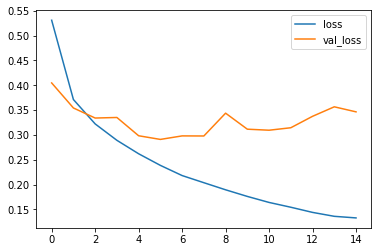

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

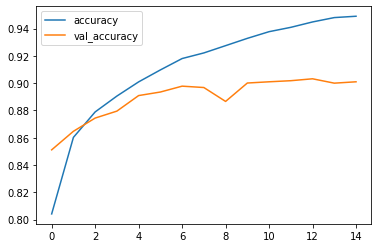

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [ ]:
labels = 'Tshirts/top Trouser Pullover dress coat sandal shirt sneaker bag ankleBoot'.split()

true label is 9 predicted is 9


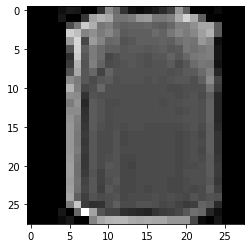

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
miss_idx = np.where(p_test !=y_test)[0]
i = np.random.choice(miss_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
print('true label is {} predicted is {}'.format(y_test[0],p_test[0]))